In [1]:
import pandas as pd
import pprint

In [2]:
lyrics = pd.read_csv('../genius_lyrics.csv')

LDA Model

In [3]:
docs = lyrics['lyrics'].tolist() #list of Unicode strings

In [4]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

#Removing stopwords:
from sklearn.feature_extraction import text
sw = ['oh','ooh','yeah','na','la','hey','like','da', 'feat',
      'whoa','uh','huh','doh','doo','ha','eh','ay','ayy','ll','re','ve'] #removing sounds & contractions
stop_words= text.ENGLISH_STOP_WORDS.union(sw)

docs = [[token for token in doc if token not in stop_words] for doc in docs]

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zylst\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In [7]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

C:\Users\zylst\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [8]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=15, no_above=0.7)

In [9]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [10]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1483
Number of documents: 1397


In [11]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) #enable logging

In [71]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 2
chunksize = 2000
passes = 40
iterations = 1000
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha=0.01,
    eta=1,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2021-06-06 16:12:03,262 : INFO : using serial LDA version on this node
2021-06-06 16:12:03,264 : INFO : running online (multi-pass) LDA training, 2 topics, 40 passes over the supplied corpus of 1397 documents, updating model once every 1397 documents, evaluating perplexity every 0 documents, iterating 1000x with a convergence threshold of 0.001000
2021-06-06 16:12:03,265 : INFO : PROGRESS: pass 0, at document #1397/1397
2021-06-06 16:12:05,574 : INFO : topic #0 (0.010): 0.019*"love" + 0.017*"just" + 0.016*"got" + 0.013*"let" + 0.012*"baby" + 0.012*"time" + 0.012*"say" + 0.011*"want" + 0.010*"cause" + 0.009*"ain"
2021-06-06 16:12:05,574 : INFO : topic #1 (0.010): 0.018*"love" + 0.018*"just" + 0.018*"got" + 0.017*"baby" + 0.014*"girl" + 0.012*"wanna" + 0.012*"make" + 0.012*"let" + 0.012*"cause" + 0.010*"ain"
2021-06-06 16:12:05,575 : INFO : topic diff=0.951882, rho=1.000000
2021-06-06 16:12:05,575 : INFO : PROGRESS: pass 1, at document #1397/1397
2021-06-06 16:12:06,696 : INFO : topic #0

2021-06-06 16:12:18,779 : INFO : topic diff=0.021410, rho=0.250000
2021-06-06 16:12:18,781 : INFO : PROGRESS: pass 15, at document #1397/1397
2021-06-06 16:12:19,470 : INFO : topic #0 (0.010): 0.027*"love" + 0.022*"just" + 0.017*"baby" + 0.015*"let" + 0.013*"time" + 0.013*"cause" + 0.013*"say" + 0.013*"got" + 0.012*"wanna" + 0.012*"want"
2021-06-06 16:12:19,471 : INFO : topic #1 (0.010): 0.023*"got" + 0.015*"girl" + 0.014*"ain" + 0.013*"nigga" + 0.012*"bitch" + 0.011*"just" + 0.011*"baby" + 0.009*"let" + 0.009*"money" + 0.009*"want"
2021-06-06 16:12:19,472 : INFO : topic diff=0.019427, rho=0.242536
2021-06-06 16:12:19,473 : INFO : PROGRESS: pass 16, at document #1397/1397
2021-06-06 16:12:19,891 : INFO : topic #0 (0.010): 0.027*"love" + 0.022*"just" + 0.017*"baby" + 0.015*"let" + 0.013*"time" + 0.013*"cause" + 0.013*"say" + 0.013*"got" + 0.012*"wanna" + 0.012*"want"
2021-06-06 16:12:19,892 : INFO : topic #1 (0.010): 0.023*"got" + 0.015*"girl" + 0.014*"ain" + 0.013*"nigga" + 0.012*"bitc

2021-06-06 16:12:25,783 : INFO : topic #0 (0.010): 0.028*"love" + 0.023*"just" + 0.019*"baby" + 0.015*"let" + 0.013*"time" + 0.013*"cause" + 0.013*"say" + 0.013*"got" + 0.012*"wanna" + 0.012*"want"
2021-06-06 16:12:25,784 : INFO : topic #1 (0.010): 0.023*"got" + 0.015*"girl" + 0.014*"ain" + 0.014*"nigga" + 0.012*"bitch" + 0.010*"just" + 0.009*"money" + 0.009*"ya" + 0.008*"let" + 0.008*"fuck"
2021-06-06 16:12:25,784 : INFO : topic diff=0.006595, rho=0.176777
2021-06-06 16:12:25,785 : INFO : PROGRESS: pass 31, at document #1397/1397
2021-06-06 16:12:26,189 : INFO : topic #0 (0.010): 0.028*"love" + 0.023*"just" + 0.019*"baby" + 0.015*"let" + 0.013*"time" + 0.013*"cause" + 0.013*"say" + 0.013*"got" + 0.012*"wanna" + 0.012*"want"
2021-06-06 16:12:26,190 : INFO : topic #1 (0.010): 0.023*"got" + 0.015*"girl" + 0.014*"ain" + 0.014*"nigga" + 0.012*"bitch" + 0.010*"just" + 0.009*"money" + 0.009*"ya" + 0.008*"let" + 0.008*"fuck"
2021-06-06 16:12:26,190 : INFO : topic diff=0.006208, rho=0.174078
2

In [72]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

2021-06-06 16:12:29,514 : INFO : CorpusAccumulator accumulated stats from 1000 documents


Average topic coherence: -0.9405.
[([(0.02800363, 'love'),
   (0.023286248, 'just'),
   (0.019186512, 'baby'),
   (0.015527131, 'let'),
   (0.013497899, 'cause'),
   (0.013380041, 'time'),
   (0.013113882, 'got'),
   (0.013113044, 'say'),
   (0.012603592, 'wanna'),
   (0.012224827, 'want'),
   (0.011825793, 'make'),
   (0.01037393, 'feel'),
   (0.00995683, 'come'),
   (0.009643793, 'way'),
   (0.009507161, 'night'),
   (0.008944435, 'girl'),
   (0.0089015495, 'right'),
   (0.008800106, 'gonna'),
   (0.008726444, 'need'),
   (0.008323895, 'life')],
  -0.9206786015105283),
 ([(0.023206366, 'got'),
   (0.014432015, 'girl'),
   (0.014133032, 'nigga'),
   (0.013803736, 'ain'),
   (0.012249157, 'bitch'),
   (0.009648836, 'money'),
   (0.0093293395, 'just'),
   (0.008821328, 'ya'),
   (0.008271592, 'fuck'),
   (0.008266324, 'let'),
   (0.00785667, 'shit'),
   (0.007551421, 'boy'),
   (0.007385945, 'want'),
   (0.007361081, 'make'),
   (0.0072643296, 'baby'),
   (0.0071820705, 'man'),
   (0.00

In [73]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2021-06-06 16:12:29,561 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2021-06-06 16:12:30,458 : INFO : 1 batches submitted to accumulate stats from 64 documents (8585 virtual)
2021-06-06 16:12:30,465 : INFO : 2 batches submitted to accumulate stats from 128 documents (15603 virtual)
2021-06-06 16:12:30,472 : INFO : 3 batches submitted to accumulate stats from 192 documents (23060 virtual)
2021-06-06 16:12:30,485 : INFO : 4 batches submitted to accumulate stats from 256 documents (47230 virtual)
2021-06-06 16:12:30,493 : INFO : 5 batches submitted to accumulate stats from 320 documents (53817 virtual)
2021-06-06 16:12:30,501 : INFO : 6 batches submitted to accumulate stats from 384 documents (59949 virtual)
2021-06-06 16:12:30,512 : INFO : 7 batches submitted to accumulate stats from 448 documents (66495 virtual)
2021-06-06 16:12:31,273 : INFO : 8 batches submitted to accumulate stats from 512 documents (73128


Coherence Score:  0.5095835094976363


## Fine tuning hyperparameters
* alpha = 0.01 seems to give best results
* beta =1
* number of topics 2 

In [33]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(
            corpus=corpus,
            id2word=id2word,
            chunksize=chunksize,
            alpha=0.01,
            eta=1,
            iterations=iterations,
            num_topics=num_topics,
            passes=passes,
            eval_every=eval_every
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

2021-06-06 15:58:22,323 : INFO : using serial LDA version on this node
2021-06-06 15:58:22,324 : INFO : running online (multi-pass) LDA training, 1 topics, 10 passes over the supplied corpus of 1397 documents, updating model once every 1397 documents, evaluating perplexity every 0 documents, iterating 200x with a convergence threshold of 0.001000
2021-06-06 15:58:22,325 : INFO : PROGRESS: pass 0, at document #1397/1397
2021-06-06 15:58:22,427 : INFO : topic #0 (0.010): 0.019*"love" + 0.018*"just" + 0.017*"got" + 0.015*"baby" + 0.013*"let" + 0.011*"girl" + 0.011*"cause" + 0.010*"want" + 0.010*"make" + 0.010*"wanna"
2021-06-06 15:58:22,428 : INFO : topic diff=0.898713, rho=1.000000
2021-06-06 15:58:22,429 : INFO : PROGRESS: pass 1, at document #1397/1397
2021-06-06 15:58:22,524 : INFO : topic #0 (0.010): 0.019*"love" + 0.018*"just" + 0.017*"got" + 0.015*"baby" + 0.013*"let" + 0.011*"girl" + 0.011*"cause" + 0.010*"want" + 0.010*"make" + 0.010*"wanna"
2021-06-06 15:58:22,525 : INFO : topic

2021-06-06 15:58:28,145 : INFO : PROGRESS: pass 2, at document #1397/1397
2021-06-06 15:58:28,986 : INFO : topic #0 (0.010): 0.022*"just" + 0.019*"love" + 0.015*"got" + 0.013*"cause" + 0.011*"wanna" + 0.011*"make" + 0.010*"time" + 0.010*"feel" + 0.010*"way" + 0.010*"right"
2021-06-06 15:58:28,987 : INFO : topic #1 (0.010): 0.020*"baby" + 0.019*"got" + 0.019*"love" + 0.017*"let" + 0.016*"girl" + 0.013*"just" + 0.012*"want" + 0.011*"say" + 0.010*"ain" + 0.009*"make"
2021-06-06 15:58:28,987 : INFO : topic diff=0.086241, rho=0.500000
2021-06-06 15:58:28,988 : INFO : PROGRESS: pass 3, at document #1397/1397
2021-06-06 15:58:29,832 : INFO : topic #0 (0.010): 0.023*"just" + 0.019*"love" + 0.015*"got" + 0.013*"cause" + 0.012*"wanna" + 0.011*"make" + 0.011*"time" + 0.010*"feel" + 0.010*"baby" + 0.010*"way"
2021-06-06 15:58:29,833 : INFO : topic #1 (0.010): 0.020*"got" + 0.019*"baby" + 0.018*"love" + 0.017*"girl" + 0.016*"let" + 0.012*"just" + 0.012*"want" + 0.011*"ain" + 0.010*"say" + 0.009*"ni

2021-06-06 15:58:38,959 : INFO : topic diff=0.994365, rho=1.000000
2021-06-06 15:58:38,960 : INFO : PROGRESS: pass 1, at document #1397/1397
2021-06-06 15:58:40,344 : INFO : topic #0 (0.010): 0.023*"just" + 0.021*"love" + 0.021*"got" + 0.016*"baby" + 0.016*"let" + 0.014*"cause" + 0.013*"want" + 0.013*"time" + 0.011*"wanna" + 0.010*"girl"
2021-06-06 15:58:40,346 : INFO : topic #1 (0.010): 0.019*"girl" + 0.018*"love" + 0.016*"make" + 0.015*"baby" + 0.014*"say" + 0.013*"wanna" + 0.013*"want" + 0.013*"ain" + 0.010*"got" + 0.010*"gonna"
2021-06-06 15:58:40,346 : INFO : topic #2 (0.010): 0.015*"got" + 0.014*"love" + 0.014*"just" + 0.010*"baby" + 0.009*"let" + 0.008*"make" + 0.007*"low" + 0.007*"girl" + 0.007*"say" + 0.007*"ain"
2021-06-06 15:58:40,347 : INFO : topic diff=0.123394, rho=0.577350
2021-06-06 15:58:40,348 : INFO : PROGRESS: pass 2, at document #1397/1397
2021-06-06 15:58:41,388 : INFO : topic #0 (0.010): 0.024*"just" + 0.022*"love" + 0.021*"got" + 0.017*"baby" + 0.016*"let" + 0.0

2021-06-06 15:58:49,959 : INFO : 11 batches submitted to accumulate stats from 704 documents (92297 virtual)
2021-06-06 15:58:49,987 : INFO : 12 batches submitted to accumulate stats from 768 documents (105492 virtual)
2021-06-06 15:58:50,084 : INFO : 13 batches submitted to accumulate stats from 832 documents (111389 virtual)
2021-06-06 15:58:50,157 : INFO : 14 batches submitted to accumulate stats from 896 documents (117905 virtual)
2021-06-06 15:58:50,299 : INFO : 15 batches submitted to accumulate stats from 960 documents (123807 virtual)
2021-06-06 15:58:50,373 : INFO : 16 batches submitted to accumulate stats from 1024 documents (129952 virtual)
2021-06-06 15:58:50,425 : INFO : 17 batches submitted to accumulate stats from 1088 documents (135404 virtual)
2021-06-06 15:58:50,545 : INFO : 18 batches submitted to accumulate stats from 1152 documents (143259 virtual)
2021-06-06 15:58:50,586 : INFO : 19 batches submitted to accumulate stats from 1216 documents (148836 virtual)
2021-06

2021-06-06 15:59:01,798 : INFO : topic diff=0.055995, rho=0.353553
2021-06-06 15:59:01,799 : INFO : PROGRESS: pass 7, at document #1397/1397
2021-06-06 15:59:02,772 : INFO : topic #0 (0.010): 0.035*"love" + 0.025*"just" + 0.022*"baby" + 0.020*"got" + 0.019*"girl" + 0.018*"let" + 0.017*"wanna" + 0.015*"cause" + 0.014*"say" + 0.013*"want"
2021-06-06 15:59:02,772 : INFO : topic #1 (0.010): 0.021*"nigga" + 0.021*"bitch" + 0.017*"got" + 0.016*"money" + 0.011*"ma" + 0.011*"yo" + 0.010*"watch" + 0.010*"ain" + 0.009*"rock" + 0.008*"boy"
2021-06-06 15:59:02,773 : INFO : topic #2 (0.010): 0.021*"got" + 0.019*"want" + 0.018*"just" + 0.017*"ain" + 0.014*"cause" + 0.013*"say" + 0.011*"make" + 0.011*"fuck" + 0.010*"let" + 0.010*"nigga"
2021-06-06 15:59:02,773 : INFO : topic #3 (0.010): 0.015*"night" + 0.012*"baby" + 0.011*"just" + 0.010*"low" + 0.010*"time" + 0.009*"love" + 0.008*"turn" + 0.008*"shake" + 0.008*"got" + 0.008*"away"
2021-06-06 15:59:02,774 : INFO : topic diff=0.048069, rho=0.333333
20

2021-06-06 15:59:13,320 : INFO : topic #4 (0.010): 0.024*"let" + 0.016*"make" + 0.016*"say" + 0.015*"want" + 0.012*"love" + 0.012*"got" + 0.012*"baby" + 0.011*"just" + 0.011*"thing" + 0.011*"feel"
2021-06-06 15:59:13,321 : INFO : topic diff=0.147572, rho=0.577350
2021-06-06 15:59:13,321 : INFO : PROGRESS: pass 2, at document #1397/1397
2021-06-06 15:59:15,015 : INFO : topic #0 (0.010): 0.047*"love" + 0.018*"got" + 0.017*"baby" + 0.016*"just" + 0.016*"cause" + 0.014*"girl" + 0.013*"right" + 0.013*"time" + 0.012*"want" + 0.011*"let"
2021-06-06 15:59:15,016 : INFO : topic #1 (0.010): 0.018*"got" + 0.015*"bitch" + 0.014*"nigga" + 0.013*"ain" + 0.013*"just" + 0.012*"baby" + 0.010*"fuck" + 0.009*"life" + 0.009*"let" + 0.008*"feel"
2021-06-06 15:59:15,017 : INFO : topic #2 (0.010): 0.022*"love" + 0.020*"just" + 0.018*"baby" + 0.018*"wanna" + 0.014*"got" + 0.014*"low" + 0.013*"shake" + 0.012*"come" + 0.011*"girl" + 0.010*"make"
2021-06-06 15:59:15,017 : INFO : topic #3 (0.010): 0.024*"just" + 

2021-06-06 15:59:21,797 : INFO : PROGRESS: pass 9, at document #1397/1397
2021-06-06 15:59:22,742 : INFO : topic #0 (0.010): 0.051*"love" + 0.023*"baby" + 0.020*"just" + 0.017*"got" + 0.017*"cause" + 0.016*"time" + 0.015*"girl" + 0.013*"want" + 0.013*"way" + 0.012*"right"
2021-06-06 15:59:22,743 : INFO : topic #1 (0.010): 0.022*"got" + 0.021*"nigga" + 0.019*"bitch" + 0.015*"ain" + 0.012*"fuck" + 0.011*"shit" + 0.011*"money" + 0.010*"just" + 0.010*"lil" + 0.007*"young"
2021-06-06 15:59:22,744 : INFO : topic #2 (0.010): 0.020*"wanna" + 0.019*"low" + 0.019*"just" + 0.016*"shake" + 0.015*"gonna" + 0.014*"baby" + 0.014*"love" + 0.014*"come" + 0.012*"got" + 0.011*"away"
2021-06-06 15:59:22,744 : INFO : topic #3 (0.010): 0.022*"just" + 0.019*"girl" + 0.018*"got" + 0.016*"night" + 0.012*"let" + 0.011*"make" + 0.010*"baby" + 0.010*"want" + 0.009*"say" + 0.009*"need"
2021-06-06 15:59:22,745 : INFO : topic #4 (0.010): 0.030*"let" + 0.026*"say" + 0.018*"make" + 0.018*"baby" + 0.017*"tonight" + 0.0

2021-06-06 15:59:34,585 : INFO : topic #3 (0.010): 0.036*"love" + 0.029*"baby" + 0.027*"got" + 0.023*"just" + 0.020*"let" + 0.016*"girl" + 0.014*"cause" + 0.014*"time" + 0.013*"come" + 0.012*"need"
2021-06-06 15:59:34,585 : INFO : topic #2 (0.010): 0.020*"just" + 0.014*"life" + 0.012*"girl" + 0.011*"ain" + 0.011*"time" + 0.010*"want" + 0.010*"cause" + 0.010*"let" + 0.010*"night" + 0.009*"wanna"
2021-06-06 15:59:34,586 : INFO : topic #1 (0.010): 0.023*"just" + 0.020*"wanna" + 0.019*"got" + 0.018*"make" + 0.015*"love" + 0.015*"baby" + 0.012*"nigga" + 0.012*"bitch" + 0.011*"ain" + 0.011*"cause"
2021-06-06 15:59:34,586 : INFO : topic #4 (0.010): 0.034*"love" + 0.031*"low" + 0.022*"shake" + 0.016*"woah" + 0.014*"girl" + 0.014*"run" + 0.012*"let" + 0.012*"got" + 0.011*"low_low" + 0.010*"said"
2021-06-06 15:59:34,587 : INFO : topic diff=0.095036, rho=0.447214
2021-06-06 15:59:34,588 : INFO : PROGRESS: pass 4, at document #1397/1397
2021-06-06 15:59:35,760 : INFO : topic #2 (0.010): 0.019*"jus

2021-06-06 15:59:42,129 : INFO : 2 batches submitted to accumulate stats from 128 documents (15470 virtual)
2021-06-06 15:59:42,141 : INFO : 3 batches submitted to accumulate stats from 192 documents (22686 virtual)
2021-06-06 15:59:42,163 : INFO : 4 batches submitted to accumulate stats from 256 documents (47175 virtual)
2021-06-06 15:59:42,175 : INFO : 5 batches submitted to accumulate stats from 320 documents (53571 virtual)
2021-06-06 15:59:42,187 : INFO : 6 batches submitted to accumulate stats from 384 documents (59820 virtual)
2021-06-06 15:59:42,199 : INFO : 7 batches submitted to accumulate stats from 448 documents (66324 virtual)
2021-06-06 15:59:43,285 : INFO : 8 batches submitted to accumulate stats from 512 documents (73038 virtual)
2021-06-06 15:59:43,575 : INFO : 9 batches submitted to accumulate stats from 576 documents (82638 virtual)
2021-06-06 15:59:43,788 : INFO : 10 batches submitted to accumulate stats from 640 documents (87414 virtual)
2021-06-06 15:59:43,997 : I

2021-06-06 15:59:54,692 : INFO : topic diff=0.082370, rho=0.408248
2021-06-06 15:59:54,693 : INFO : PROGRESS: pass 5, at document #1397/1397
2021-06-06 15:59:55,808 : INFO : topic #4 (0.010): 0.024*"come" + 0.020*"love" + 0.018*"let" + 0.017*"que" + 0.016*"work" + 0.016*"te" + 0.013*"yo" + 0.012*"baby" + 0.012*"ba" + 0.012*"got"
2021-06-06 15:59:55,809 : INFO : topic #2 (0.010): 0.028*"just" + 0.023*"baby" + 0.017*"got" + 0.017*"let" + 0.016*"low" + 0.013*"shake" + 0.012*"hand" + 0.012*"make" + 0.012*"cause" + 0.011*"wanna"
2021-06-06 15:59:55,810 : INFO : topic #6 (0.010): 0.079*"love" + 0.024*"baby" + 0.019*"just" + 0.017*"got" + 0.017*"want" + 0.015*"wanna" + 0.013*"heart" + 0.013*"cause" + 0.013*"time" + 0.012*"feel"
2021-06-06 15:59:55,811 : INFO : topic #1 (0.010): 0.022*"got" + 0.021*"nigga" + 0.020*"ain" + 0.015*"bitch" + 0.014*"just" + 0.012*"shit" + 0.009*"cause" + 0.009*"run" + 0.008*"let" + 0.008*"head"
2021-06-06 15:59:55,812 : INFO : topic #5 (0.010): 0.033*"girl" + 0.023

2021-06-06 16:00:03,755 : INFO : 20 batches submitted to accumulate stats from 1280 documents (159525 virtual)
2021-06-06 16:00:03,943 : INFO : 21 batches submitted to accumulate stats from 1344 documents (165275 virtual)
2021-06-06 16:00:03,998 : INFO : 22 batches submitted to accumulate stats from 1408 documents (170025 virtual)
2021-06-06 16:00:05,297 : INFO : 7 accumulators retrieved from output queue
2021-06-06 16:00:05,322 : INFO : accumulated word occurrence stats for 174009 virtual documents
2021-06-06 16:00:05,600 : INFO : using serial LDA version on this node
2021-06-06 16:00:05,603 : INFO : running online (multi-pass) LDA training, 8 topics, 10 passes over the supplied corpus of 1397 documents, updating model once every 1397 documents, evaluating perplexity every 0 documents, iterating 200x with a convergence threshold of 0.001000
2021-06-06 16:00:05,604 : INFO : PROGRESS: pass 0, at document #1397/1397
2021-06-06 16:00:07,984 : INFO : topic #4 (0.010): 0.026*"just" + 0.026*

2021-06-06 16:00:15,661 : INFO : topic #7 (0.010): 0.036*"just" + 0.032*"let" + 0.020*"tonight" + 0.017*"dance" + 0.017*"hand" + 0.017*"feel" + 0.015*"come" + 0.013*"make" + 0.011*"turn" + 0.011*"stop"
2021-06-06 16:00:15,662 : INFO : topic #2 (0.010): 0.035*"got" + 0.023*"nigga" + 0.021*"ain" + 0.019*"bitch" + 0.015*"money" + 0.013*"girl" + 0.013*"fuck" + 0.012*"just" + 0.012*"shit" + 0.012*"make"
2021-06-06 16:00:15,663 : INFO : topic diff=0.064285, rho=0.353553
2021-06-06 16:00:15,664 : INFO : PROGRESS: pass 7, at document #1397/1397
2021-06-06 16:00:16,904 : INFO : topic #4 (0.010): 0.037*"love" + 0.028*"just" + 0.021*"want" + 0.020*"time" + 0.019*"wanna" + 0.017*"cause" + 0.014*"got" + 0.014*"way" + 0.014*"life" + 0.014*"make"
2021-06-06 16:00:16,904 : INFO : topic #7 (0.010): 0.036*"just" + 0.034*"let" + 0.021*"tonight" + 0.017*"dance" + 0.017*"hand" + 0.017*"feel" + 0.015*"come" + 0.013*"make" + 0.012*"turn" + 0.011*"stop"
2021-06-06 16:00:16,905 : INFO : topic #0 (0.010): 0.066

2021-06-06 16:00:27,391 : INFO : topic diff=1.083488, rho=1.000000
2021-06-06 16:00:27,392 : INFO : PROGRESS: pass 1, at document #1397/1397
2021-06-06 16:00:28,955 : INFO : topic #2 (0.010): 0.031*"just" + 0.029*"got" + 0.029*"baby" + 0.021*"wanna" + 0.019*"love" + 0.015*"cause" + 0.015*"let" + 0.014*"make" + 0.013*"want" + 0.012*"girl"
2021-06-06 16:00:28,956 : INFO : topic #5 (0.010): 0.031*"girl" + 0.025*"love" + 0.025*"just" + 0.014*"got" + 0.014*"make" + 0.013*"cause" + 0.012*"ain" + 0.011*"let" + 0.010*"life" + 0.010*"right"
2021-06-06 16:00:28,957 : INFO : topic #8 (0.010): 0.031*"low" + 0.021*"got" + 0.018*"work" + 0.018*"say" + 0.016*"nigga" + 0.015*"need" + 0.013*"let" + 0.012*"low_low" + 0.010*"love" + 0.009*"hand"
2021-06-06 16:00:28,959 : INFO : topic #1 (0.010): 0.027*"tonight" + 0.025*"let" + 0.015*"talk" + 0.013*"taste" + 0.013*"won" + 0.011*"want" + 0.011*"ya" + 0.011*"walk" + 0.011*"baby" + 0.010*"got"
2021-06-06 16:00:28,960 : INFO : topic #0 (0.010): 0.031*"love" +

2021-06-06 16:00:38,399 : INFO : topic #5 (0.010): 0.044*"girl" + 0.028*"just" + 0.023*"love" + 0.016*"got" + 0.014*"make" + 0.014*"cause" + 0.013*"dance" + 0.012*"ain" + 0.012*"let" + 0.011*"life"
2021-06-06 16:00:38,399 : INFO : topic #3 (0.010): 0.031*"nigga" + 0.029*"bitch" + 0.017*"got" + 0.014*"fuck" + 0.013*"woo" + 0.013*"money" + 0.012*"que" + 0.011*"te" + 0.010*"ain" + 0.010*"yo"
2021-06-06 16:00:38,400 : INFO : topic #4 (0.010): 0.015*"just" + 0.014*"say" + 0.013*"love" + 0.012*"come" + 0.012*"away" + 0.011*"time" + 0.011*"better" + 0.010*"shake" + 0.009*"little" + 0.009*"let"
2021-06-06 16:00:38,400 : INFO : topic #0 (0.010): 0.024*"love" + 0.014*"lil" + 0.013*"head" + 0.011*"song" + 0.010*"light" + 0.008*"make" + 0.008*"high" + 0.007*"gonna" + 0.007*"gone" + 0.007*"deep"
2021-06-06 16:00:38,401 : INFO : topic diff=0.044038, rho=0.316228
2021-06-06 16:00:38,402 : INFO : PROGRESS: pass 9, at document #1397/1397
2021-06-06 16:00:39,702 : INFO : topic #8 (0.010): 0.041*"low" + 

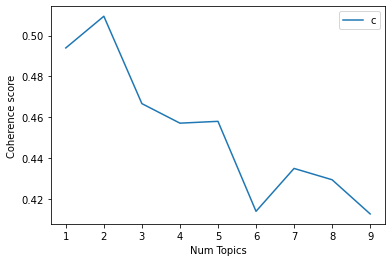

In [34]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=1, limit=10, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()